In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/raw/hotel_bookings2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

## Zmienna docelowa jest umiarkowanie niezbalansowana, co odzwierciedla realistyczne warunki biznesowe.

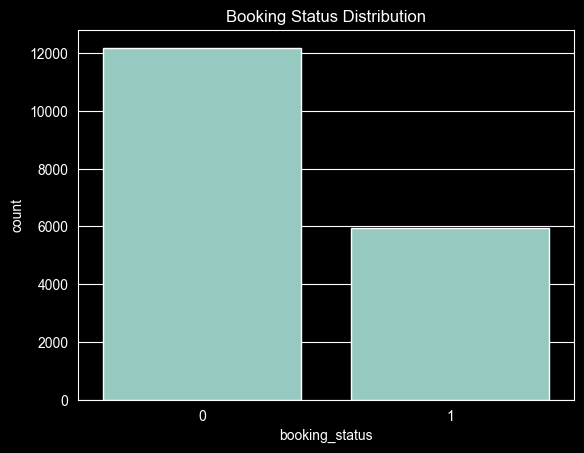

In [30]:
sns.countplot(x="booking_status", data=df)
plt.title("Booking Status Distribution")
plt.show()

In [34]:
df["booking_status"].value_counts(normalize=True)

booking_status
0    0.7079
1    0.2921
Name: proportion, dtype: float64

In [27]:
df.shape

(18137, 18)

In [28]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [44]:
df.duplicated().sum()

np.int64(4111)

In [45]:
df = df.drop_duplicates()

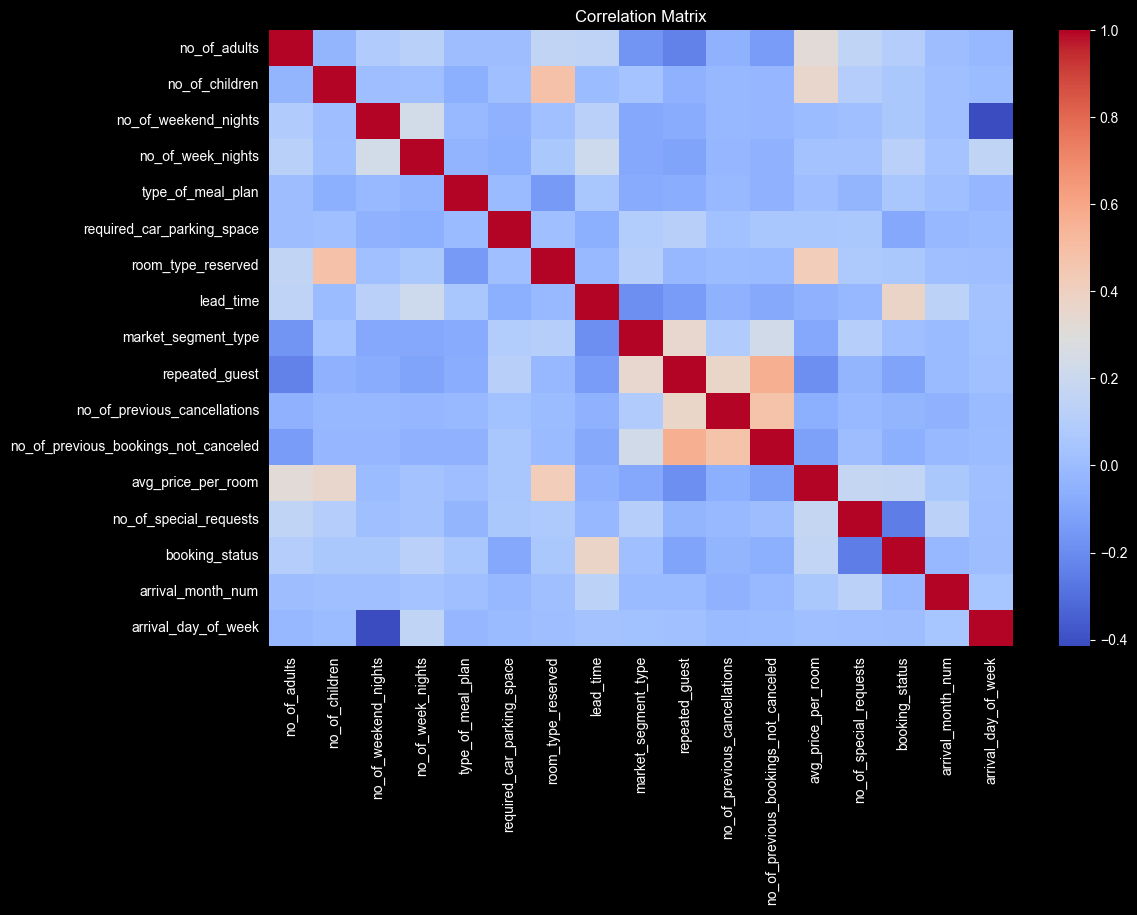

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Correlation Matrix")
plt.show()


In [36]:
corr_with_target = (
    df.corr()["booking_status"]
    .sort_values(key=lambda x: abs(x), ascending=False)
)

corr_with_target


booking_status                          1.000000
lead_time                               0.371613
no_of_special_requests                 -0.252459
arrival_year                            0.163536
avg_price_per_room                      0.160827
no_of_week_nights                       0.125330
repeated_guest                         -0.109263
no_of_adults                            0.104313
required_car_parking_space             -0.092838
no_of_weekend_nights                    0.064921
no_of_previous_bookings_not_canceled   -0.063357
no_of_children                          0.062914
room_type_reserved                      0.061940
type_of_meal_plan                       0.056281
no_of_previous_cancellations           -0.034563
arrival_month                          -0.016197
arrival_date                            0.012859
market_segment_type                     0.012078
Name: booking_status, dtype: float64

In [46]:
df["arrival_datetime"] = pd.to_datetime(
    df["arrival_year"].astype(str) + "-" +
    df["arrival_month"].astype(str) + "-" +
    df["arrival_date"].astype(str),
    errors="coerce"
)

In [49]:
df["arrival_datetime"].isna().sum()

np.int64(0)

In [48]:
df = df.dropna(subset=["arrival_datetime"])


In [50]:
df["arrival_month_num"] = df["arrival_datetime"].dt.month
df["arrival_day_of_week"] = df["arrival_datetime"].dt.weekday


In [51]:
df = df.drop(columns=[
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "arrival_datetime"
])


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14005 entries, 0 to 18136
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14005 non-null  int64  
 1   no_of_children                        14005 non-null  int64  
 2   no_of_weekend_nights                  14005 non-null  int64  
 3   no_of_week_nights                     14005 non-null  int64  
 4   type_of_meal_plan                     14005 non-null  int64  
 5   required_car_parking_space            14005 non-null  int64  
 6   room_type_reserved                    14005 non-null  int64  
 7   lead_time                             14005 non-null  int64  
 8   market_segment_type                   14005 non-null  int64  
 9   repeated_guest                        14005 non-null  int64  
 10  no_of_previous_cancellations          14005 non-null  int64  
 11  no_of_previous_booki

In [54]:
df.to_csv(
    "../data/processed/hotel_bookings_clean2.csv",
    index=False
)